In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [26]:
train = pd.read_csv('MovieGenreSmall.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,imdbId,Genre,Drama,Romance,Short,Crime,Fantasy,Horror,Mystery,Adventure,History,Animation,Comedy,War,Western,Family,Action,Sport,Biography,Sci-fi
0,2461,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2544,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2795,Short|Drama|Romance,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2844,Crime|Drama,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2985,Short|Drama,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
train.columns

Index(['imdbId', 'Genre', 'Drama', 'Romance', 'Short', 'Crime', 'Fantasy',
       'Horror', 'Mystery', 'Adventure', 'History', 'Animation', 'Comedy',
       'War', 'Western', 'Family', 'Action', 'Sport', 'Biography', 'Sci-fi'],
      dtype='object')

In [28]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('movie_dataset/SampleMoviePosters/'+str(train['imdbId'][i])+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 162.91it/s]


In [29]:
X.shape

(59, 400, 400, 3)

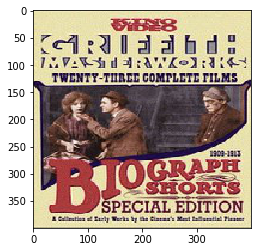

In [30]:
plt.imshow(X[2])

In [31]:
train['Genre'][2]

'Short|Drama|Romance'

In [32]:
y = np.array(train.drop(['Genre'],axis=1))
y.shape

(59, 19)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [39]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='sigmoid'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 93, 93, 64)        51264     
__________

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 53 samples, validate on 6 samples
Epoch 1/10
53/53 [==============================] - 20s 375ms/step - loss: -187.8727 - acc: 0.4300 - val_loss: -3584.1858 - val_acc: 0.6053
Epoch 2/10
53/53 [==============================] - 7s 125ms/step - loss: -3830.5259 - acc: 0.5223 - val_loss: -3582.9153 - val_acc: 0.6404
Epoch 3/10
53/53 [==============================] - 6s 112ms/step - loss: -3829.7134 - acc: 0.5243 - val_loss: -3582.6570 - val_acc: 0.6404
Epoch 4/10
53/53 [==============================] - 6s 122ms/step - loss: -3830.1089 - acc: 0.5660 - val_loss: -3582.6184 - val_acc: 0.6842
Epoch 5/10
53/53 [==============================] - 6s 120ms/step - loss: -3830.0566 - acc: 0.5700 - val_loss: -3582.5784 - val_acc: 0.7456
Epoch 6/10
53/53 [==============================] - 6s 111ms/step - loss: -3829.9604 - acc: 0.5770 - val_loss: -3582.5488 - val_acc: 0.7456
Epoch 7/10
53/53 [==============================] - 6s 114ms/step - loss: -3830.0579 - acc: 0.5829 - val_loss: -3582.

In [44]:
img = image.load_img('GOT.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255


Drama (1.0)
War (1.0)
History (1.0)


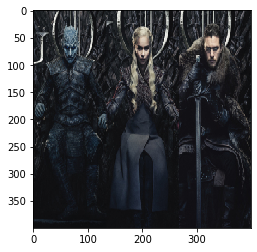

In [46]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]%18])+" ({:.3})".format(proba[0][top_3[i]%18]))
plt.imshow(img)